In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

In [3]:
data.shape

(50000, 2)

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [6]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

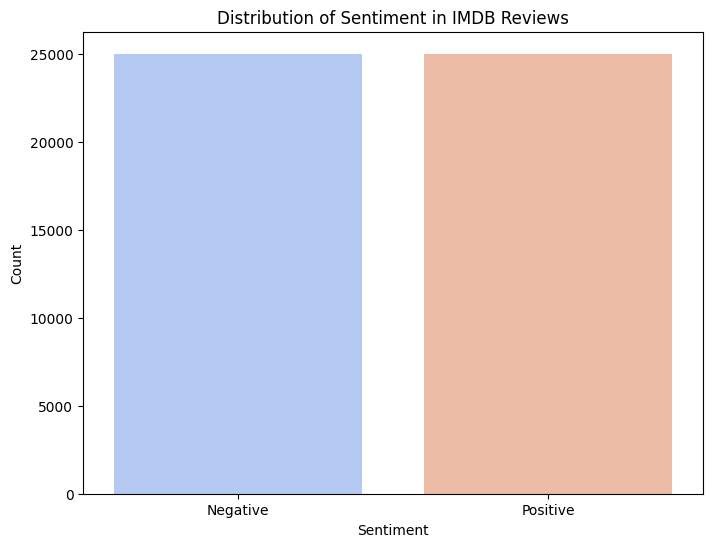

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment', y='count', data=sentiment_counts, palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.title('Distribution of Sentiment in IMDB Reviews')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()


In [8]:
# positive -> 1
# negative -> 0
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

In [9]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [10]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [11]:
!pip install contractions
import re
import contractions

def clean_text(text):
    text = contractions.fix(text)
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

data['review'] = data['review'].apply(clean_text)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.8 MB/s eta 0:00:00


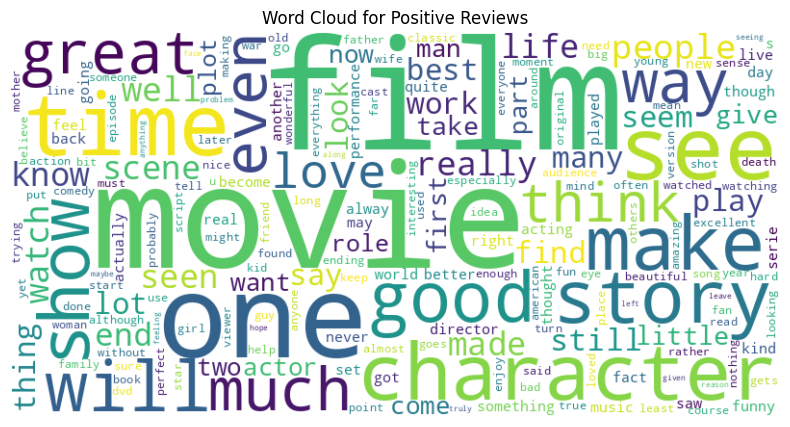

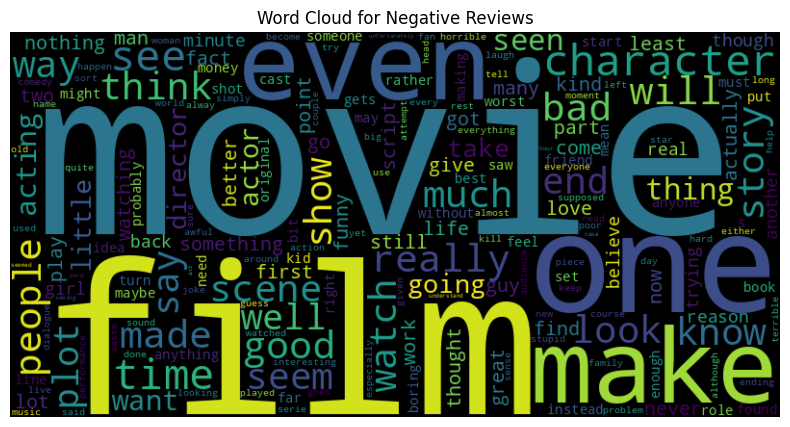

In [12]:
from wordcloud import WordCloud

positive_reviews = ' '.join(data[data['sentiment'] == 1]['review'])
negative_reviews = ' '.join(data[data['sentiment'] == 0]['review'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [13]:
import nltk
import subprocess

try:
    nltk.data.find('stopwords')
    print("stopwords already downloaded.")
except LookupError:
    print("Downloading stopwords...")
    nltk.download('stopwords', download_dir='/kaggle/working/')
    print("stopwords downloaded successfully.")

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /kaggle/working/...
[nltk_data]   Unzipping corpora/stopwords.zip.
stopwords downloaded successfully.


In [14]:
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

data['review'] = data['review'].apply(preprocess_text)

In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-10-06 15:08:57.648360: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 15:08:57.648504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 15:08:57.830855: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [16]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)

In [17]:
train_data.shape

(40000, 2)

In [18]:
test_data.shape

(10000, 2)

In [19]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])

In [20]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [21]:
X_train

array([[   0,    0,    0, ...,   96,  220, 3553],
       [   0,    0,    0, ...,   13, 1562,   28],
       [   0,    0,    0, ...,  190,  580,   11],
       ...,
       [   0,    0,    0, ...,  973, 1436,  490],
       [   0,    0,    0, ..., 1103,  132,   28],
       [   0,    0,    0, ...,  349,   12, 1767]], dtype=int32)

In [22]:
X_test

array([[   0,    0,    0, ...,  161,   93,  818],
       [   0,    0,    0, ...,   28, 1706,   10],
       [   0,    0,    0, ...,  797,  903,   21],
       ...,
       [   0,    0,    0, ...,  451,   85, 3118],
       [   0,    0,    0, ...,  108,   65, 2034],
       [   0,    0,    0, ...,   10,  218,    3]], dtype=int32)

In [23]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [24]:
Y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [25]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GlobalMaxPooling1D, BatchNormalization
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])

In [28]:
history = model.fit(X_train, Y_train, epochs = 5, batch_size = 64, validation_split = 0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 231s 454ms/step - accuracy: 0.7122 - loss: 0.8128 - val_accuracy: 0.8691 - val_loss: 0.3300
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 227s 454ms/step - accuracy: 0.8900 - loss: 0.2972 - val_accuracy: 0.8716 - val_loss: 0.3175
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 228s 455ms/step - accuracy: 0.9126 - loss: 0.2521 - val_accuracy: 0.8708 - val_loss: 0.3215
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 265s 461ms/step - accuracy: 0.9244 - loss: 0.2150 - val_accuracy: 0.8715 - val_loss: 0.3164
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 257s 452ms/step - accuracy: 0.9402 - loss: 0.1909 - val_accuracy: 0.8631 - val_loss: 0.3615


In [29]:
model.save("model.h5")

In [30]:
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [41]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.8634 - loss: 0.3561


In [42]:
print("Accuracy: ",accuracy)
print("Loss: ",loss)

Accuracy:  0.864799976348877
Loss:  0.3528152406215668


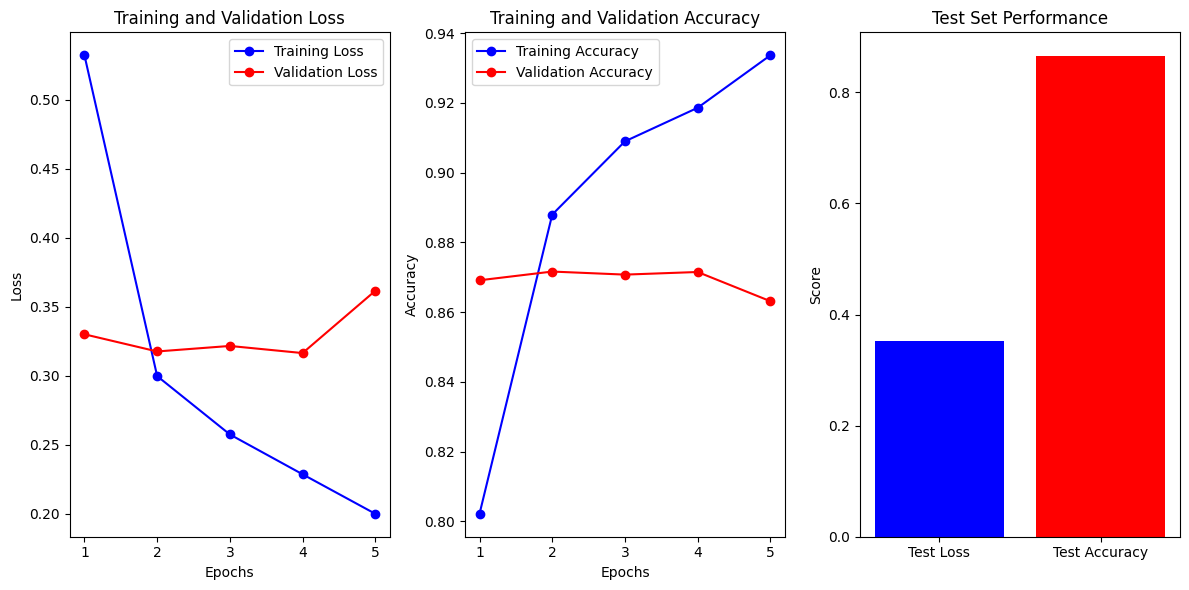

In [43]:
import matplotlib.pyplot as plt

epochs = range(1, 6)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.bar(['Test Loss', 'Test Accuracy'], [loss, accuracy], color=['blue', 'red'])
plt.title('Test Set Performance')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

In [44]:
def predictive_system(review):
    sequences = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequences, maxlen=200)
    prediction = model.predict(padded_sequence)
    print(prediction)
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment

In [45]:
predictive_system("This movie was fantastic and amazing")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.9758338]]


'positive'

In [46]:
predictive_system("Boring movie")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.23262948]]


'negative'

In [48]:
import shap
import numpy as np

# Sample review to interpret (this should be tokenized and padded)
sample_review = X_test[0:1]  # Select the first review in the test set

# Compute SHAP values
shap_values = explainer.shap_values(sample_review)

# Assuming `model` is your trained Keras model and `tokenizer` is your text tokenizer
explainer = shap.KernelExplainer(model.predict, X_train[:100])  # Using a small subset due to KernelExplainer's slower speed
shap_values = explainer.shap_values(sample_review)


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
7650/7650 ━━━━━━━━━━━━━━━━━━━━ 843s 110ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step 


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
7650/7650 ━━━━━━━━━━━━━━━━━━━━ 844s 110ms/step


In [49]:
print(np.array(shap_values).shape)

print(sample_review.shape)

(1, 1, 200)
(1, 200)


In [50]:
shap_values_squeezed = np.squeeze(shap_values)  # Now it should be (200,)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values_squeezed, sample_review[0], feature_names=[tokenizer.index_word.get(idx, '') for idx in sample_review[0]])


In [59]:
def predict_text(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=200)
    preds = model.predict(padded_sequences)
    
    # Ensure output is a 2D array with probabilities for both classes
    if preds.ndim == 1 or preds.shape[1] == 1:  # Single output case (sigmoid)
        preds = np.hstack([1 - preds, preds])  # Convert to shape (num_samples, 2)
    
    return preds

sample_text = ["This movie was fantastic and amazing"]
prediction = predict_text(sample_text)
print(prediction)
print("Prediction shape:", prediction.shape)  # Should be (1, 2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.02416623 0.9758338 ]]
Prediction shape: (1, 2)


In [64]:
import numpy as np
from lime.lime_text import LimeTextExplainer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

class_names = ['Negative', 'Positive']

explainer = LimeTextExplainer(class_names=class_names)

def predict_text(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=200)
    preds = model.predict(padded_sequences)
    
    if preds.ndim == 1 or preds.shape[1] == 1: 
        preds = np.hstack([1 - preds, preds])  
    
    return preds


review_to_explain = test_data["review"].iloc[0]

explanation = explainer.explain_instance(
    review_to_explain,
    predict_text,
    num_features=10,
    labels=(1,)
)

explanation.show_in_notebook(text=True)
explanation.save_to_file('lime_explanation.html')
top_words = explanation.as_list()

157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 108ms/step


In [62]:
import pandas as pd

top_words = explanation.as_list()
df = pd.DataFrame(top_words, columns=["Test Words", "Weights or biases (approx)"])

df.style.set_table_styles([{'selector': 'thead th', 'props': [('background-color', '#f5f5f5')]}])

,Test Words,Weights or biases (approx)
0,terrible,-0.726358
1,glad,0.118465
2,best,0.111906
3,strong,0.107521
4,huge,-0.056418
5,ok,-0.055174
6,boring,-0.055108
7,reason,-0.043741
8,could,-0.027866
9,interesting,-0.021979


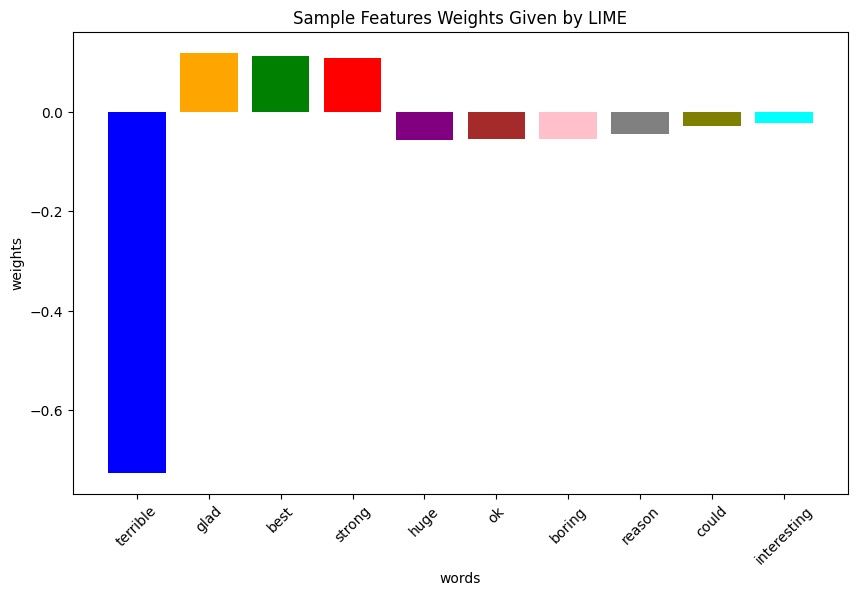

In [63]:
import matplotlib.pyplot as plt

# Extract words and their corresponding weights from the explanation
words = [item[0] for item in top_words]
weights = [item[1] for item in top_words]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, weights, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
plt.title("Sample Features Weights Given by LIME")
plt.xlabel("words")
plt.ylabel("weights")
plt.xticks(rotation=45)
plt.show()
